### PROJECT 뉴스기사 크롤링 및 분류

In [1]:
import os
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib as mpl
import matplotlib.font_manager as fm

#### 01 데이터 불러오기 

- 대용량의 크롤링으로 인해 트래픽 문제가 있을 수 있어 미리 크롤링한 파일을 활용

In [2]:
mpl.rcParams['font.family']

['D2Coding']

In [3]:
csv_path1 = os.getenv("HOME") + "/HDD/Dev/Aiffel/03_news_crawling_classification/news_crawler/news_data.csv"
csv_path2 = os.getenv("HOME") + "/HDD/Dev/Aiffel/03_news_crawling_classification/news_crawler/news_data2.csv"

df1 = pd.read_table(csv_path1, sep=',')
df1

,news,code
0,파주시청. 사진제공=파주시 파주시청. 사진제공=파주시\n\n[파주=파이낸셜뉴스 강근...,사회
1,동영상 뉴스\n\n이천 물류창고 화재 발화지점으로 지목된 지하 2층에서 산소절단기의...,사회
2,황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검. 사진...,사회
3,귀갓길 여성을 쫓아가 성범죄를 시도한 20대 남성이 구속됐습니다.서울 강남경찰서는 ...,사회
4,(서울=연합뉴스) 대한약사회가 6일부터 코로나바이러스 감염증 대응 체계를 '사회적 ...,사회
...,...,...
5119,신종 코로나바이러스 감염증(코로나19) 사태 이후 ‘가정의 달’ 5월에도 언택트(비...,IT/과학
5120,는 소비자로부터 월 이용료 1만~2만원을 받고 초고속 인터넷을 제공한다. 그런 SK...,IT/과학
5121,머리를 긁고 있는 오랑우탄. 몸을 긁는 행동을 따라 하는 것은 부정적 감정과 관련이...,IT/과학
5122,가 오는 15일 정식 출시하는 스마트폰 'LG벨벳'이 사실상 '공짜폰'이 될 전망이...,IT/과학


In [4]:
df2 = pd.read_table(csv_path2, sep=',')
df2

,news,code
0,기사 섹션 분류 안내\n\n기사의 섹션 정보는 해당 언론사의 분류를 따르고 있습니다...,경제
1,▶제21대 총선 실시간 개표 현황 및 결과 보기\n\n총선에서 여당이 다시 한 번 ...,경제
2,[뉴욕=AP/뉴시스]지난 10일 뉴욕 증권거래소 건물에 미국 국기가 게양되어 있다....,경제
3,"부산지역 주유소에서 판매하는 기름값이 휘발유는 평균 1200원대, 경유는 1000원...",경제
4,담배업계가 소비자의 취향을 저격한 다양한 담배 신제품들을 잇달아 선보이고 있다.이전...,경제
...,...,...
3698,레고켐바이오사이언스(대표 김용주·사진)가 글로벌 기술수출에 또다시 성공했다. 201...,IT/과학
3699,제21대 국회의원선거 기간 중단됐던 네이버 실시간 급상승 검색어 서비스가 15일 오...,IT/과학
3700,아마존 [AFP=연합뉴스 자료사진] 아마존 [AFP=연합뉴스 자료사진]\n\n직원들...,IT/과학
3701,"제21대 국회의원선거가 임박한 가운데, 투표 및 개표 방송을 준비하는 기업들의 움직...",IT/과학


In [5]:
df1['news'] = df1['news'].str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]","")
df2['news'] = df2['news'].str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]","")
df2['news']

0       기사 섹션 분류 안내기사의 섹션 정보는 해당 언론사의 분류를 따르고 있습니다 언론사...
1       제대 총선 실시간 개표 현황 및 결과 보기총선에서 여당이 다시 한 번 승리를 거두면...
2       뉴욕뉴시스지난 일 뉴욕 증권거래소 건물에 미국 국기가 게양되어 있다 신종 코로나바이...
3       부산지역 주유소에서 판매하는 기름값이 휘발유는 평균 원대 경유는 원대에 돌입했다일 ...
4       담배업계가 소비자의 취향을 저격한 다양한 담배 신제품들을 잇달아 선보이고 있다이전까...
                              ...                        
3698    레고켐바이오사이언스대표 김용주사진가 글로벌 기술수출에 또다시 성공했다 년 중국 포순...
3699    제대 국회의원선거 기간 중단됐던 네이버 실시간 급상승 검색어 서비스가 일 오후 시부...
3700    아마존 연합뉴스 자료사진 아마존 연합뉴스 자료사진직원들 코로나 확산 방지 조치 충분...
3701    제대 국회의원선거가 임박한 가운데 투표 및 개표 방송을 준비하는 기업들의 움직임이 ...
3702    롤 점검이 일 진행될 예정이다온라인게임 리그오브레전드이하 롤은 일 오전 시부터 오전...
Name: news, Length: 3703, dtype: object

In [6]:
print(df1.isnull().sum())
print(df2.isnull().sum())

news    0
code    0
dtype: int64
news    0
code    0
dtype: int64


In [7]:
df1.drop_duplicates(subset=['news'], inplace=True)

print('뉴스 기사의 개수:', len(df1))

df2.drop_duplicates(subset=['news'], inplace=True)

print('뉴스 기사의 개수:', len(df2))

뉴스 기사의 개수: 3994
뉴스 기사의 개수: 2137


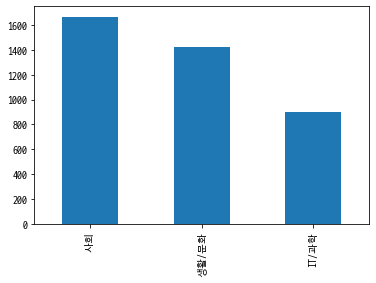

In [8]:
df1['code'].value_counts().plot(kind='bar')

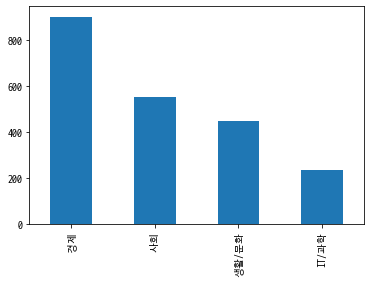

In [9]:
df2['code'].value_counts().plot(kind='bar')

In [31]:
print(df1.groupby('code').size().reset_index(name='count'))
print(df2.groupby('code').size().reset_index(name='count'))

    code  count
0  IT/과학    903
1     사회   1668
2  생활/문화   1423
    code  count
0  IT/과학    235
1     경제    902
2     사회    554
3  생활/문화    446


#### 02 형태소 분석기 변경 

In [32]:
# 토큰화 및 불용어 삭제 전처리 함수
def preprocessing(data):
    text_data = []

    for sentence in data:
        temp_data = []
        temp_data = tokenizer.morphs(sentence)
        temp_data=[word for word in temp_data if not word in stopwords]
        text_data.append(temp_data)
    
    text_data = list(map(' '.join, text_data))

    return text_data

# test 데이터 TF-IDF 변환 함수
def tfidf_vectorizer(data):
    data_counts = count_vect.transform(data)
    data_tfidf = tfidf_transformer.transform(data_counts)
    return data_tfidf

In [33]:
from konlpy.tag import Hannanum
from konlpy.tag import Kkma
from konlpy.tag import Komoran
from konlpy.tag import Okt
hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
okt = Okt()
tok_dic = {'Hannanum': hannanum, 'Kkma' : kkma, 'Komoran' : komoran, 'Okt' : okt}


In [34]:
for token in tok_dic.items():
    stopwords = []
    start = time.time()
    tokenizer = token[1] 
    print(token[0])
    text_data = preprocessing(df1['news'])
    print('time(sec) : ', time.time() - start)
    X_train, X_test, y_train, y_test = train_test_split(text_data, df1['code'], random_state = 9)
    count_vect = CountVectorizer()
    X_train_counts = count_vect.fit_transform(X_train)

    tfidf_transformer = TfidfTransformer()
    X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

    clf = MultinomialNB().fit(X_train_tfidf, y_train)

    y_pred = clf.predict(tfidf_vectorizer(X_test))
    print(metrics.classification_report(y_test, y_pred))

Hannanum
time(sec) :  196.92022013664246
              precision    recall  f1-score   support

       IT/과학       0.91      0.72      0.81       218
          사회       0.81      0.90      0.85       439
       생활/문화       0.82      0.80      0.81       342

    accuracy                           0.83       999
   macro avg       0.84      0.81      0.82       999
weighted avg       0.83      0.83      0.83       999

Kkma
time(sec) :  1295.5334627628326
              precision    recall  f1-score   support

       IT/과학       0.89      0.78      0.83       218
          사회       0.79      0.91      0.84       439
       생활/문화       0.85      0.75      0.80       342

    accuracy                           0.83       999
   macro avg       0.84      0.81      0.82       999
weighted avg       0.83      0.83      0.82       999

Komoran
time(sec) :  77.22422957420349
              precision    recall  f1-score   support

       IT/과학       0.89      0.78      0.83       218
          사회

** 형태소 분석기는 Kkma > Hannanum > Okt > Komoran 순으로 속도가 빨라집니다. 또한 f1-score를 기준으로하면 Komoran 형태소분석이 성능이 가장 뛰어난 것으로 볼 수 있습니다. **

#### 03 불용어 추가해 보기

- 가장 성능이 뛰어난 Komoran 형태소 분석기를 활용하여 불용어를 추가하면서 성능의 향상을 관찰해볼 예정입니다.

In [35]:
tokenizer = Komoran()

stopwords = ['저작권', '파이낸셜뉴스', '무단', '전재', '재', '배포', '금지', '사진', '제공', 'ㄴ', '및', '기자', '니다','ㄱ씨', 'ㄹ', 'ㄴ다', 'ㄱㅈㅅ만을', '을', '를']
start = time.time()
text_data = preprocessing(df1['news'])
print('time(sec) : ', time.time() - start)
print(text_data[0])

X_train, X_test, y_train, y_test = train_test_split(text_data, df1['code'], random_state = 9)
print('훈련용 뉴스 기사의 개수 :', len(X_train))
print('테스트용 뉴스 기사의 개수 : ', len(X_test))
print('훈련용 레이블의 개수 : ', len(y_train))
print('테스트용 레이블의 개수 : ', len(y_test))

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))



time(sec) :  152.69681906700134
파주 시청 파주시 파주 시청 파주시 파주 강 근 주 파주시 는 일 관내 취약 계층 만 가구 에 대하 아 정부 긴급 재난 지원금 입금 완료 하 았 다 파주시 민이 받 는 긴급 재난 지원금 은 인 이상 가구 기준 으로 만원 받 게 되 며 인 가구 는 만원 인 가구 만원 인 가구 만원 이다 정부 가 발표 하 긴급 재난 지원금 이 파주시 민 에게 지급 하 금액 과 다른 이유 는 국비 지방비 부담 비율 때문 이다 파주시 는 이미 모든 시민 에게 경기도 파주시 재난 기본소득 인당 각 만원 지급 하 고 있 어 시민 에게 국비 지원금 만 지급 하 며 인 가구 기준 으로 총 지원 금액 은 파주시 재난 기본소득 만원 경기도 재난 기본소득 만원 정부 긴급 재난 지원금 만원 등 총 만원 받 게 되 다 취약 계층 이 아니 시민 은 오 는 월 일 부터 소지 하 고 있 는 신용 체크카드 사 홈페이지 에서 긴급 재난 지원금 지원 신청 하 수 있 다 세대주 가 가족 지원금 일괄 신청 하 아야 한 다 한편 파주시 는 일 김정기 부시장 단장 으로 하 는 긴급 재난 지원금 추진 태스크포스를 구성 하 아 긴급 재난 지원금 이 원활 하 게 지급 되 수 있 도록 지원 하 자
훈련용 뉴스 기사의 개수 : 2995
테스트용 뉴스 기사의 개수 :  999
훈련용 레이블의 개수 :  2995
테스트용 레이블의 개수 :  999
              precision    recall  f1-score   support

       IT/과학       0.89      0.78      0.83       218
          사회       0.80      0.91      0.85       439
       생활/문화       0.85      0.75      0.80       342

    accuracy                           0.83       999
   macro avg       0.84   